In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0,)
y_data=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0)
y_data=y_data[y_data>0]#no erroors

In [0]:
result = x_data.join(y_data, how='outer').dropna()

In [0]:
x_data=result.iloc[:,9:18]

In [0]:
x_data

In [0]:
y_data=result["value"]/3.6 #Km/h to m/s

In [0]:
y_data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [0]:
y_pred=LinearRegression().fit(x_train,y_train).predict(x_test)

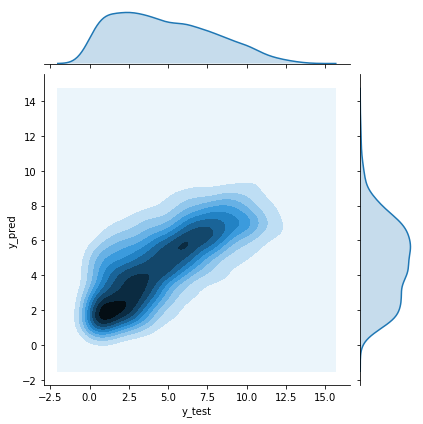

In [27]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,)

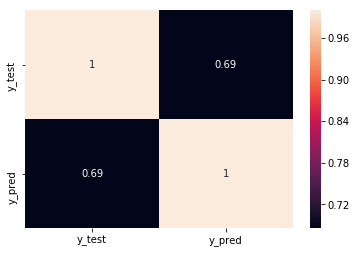

In [28]:
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2['DIF']=y_pred-y_test


  

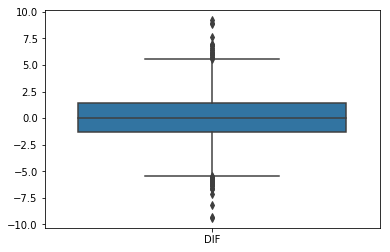

In [32]:
ax = sns.boxplot(data=df2.iloc[:,2:3])

In [31]:
df2.iloc[:,2:3].describe()

,DIF
count,2550.000000
mean,0.039854
std,2.253813
min,-9.391804
25%,-1.311033
50%,0.051320
75%,1.455347
max,9.211062
